In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('pune_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,SR,BP,VWS,Xylene,RF,TOT-RF,date,day,month,year
0,Pune,125.41,203.30,32.97,14.84,51.10,84.07,1.14,11.34,2.85,...,NaN,NaN,NaN,NaN,0.32,30.24,2019-01-01,1,1,2019
1,Pune,95.27,170.37,32.75,14.74,50.48,83.48,0.78,11.40,2.28,...,NaN,NaN,NaN,NaN,0.22,21.07,2019-02-01,2,1,2019
2,Pune,81.50,153.04,35.73,16.08,55.39,88.23,1.13,11.45,2.23,...,NaN,NaN,NaN,NaN,0.22,21.43,2019-03-01,3,1,2019
3,Pune,88.87,151.95,31.44,14.15,48.53,80.16,1.17,11.43,2.20,...,NaN,NaN,NaN,NaN,0.24,23.05,2019-04-01,4,1,2019
4,Pune,91.47,159.32,28.73,12.93,44.04,73.49,0.95,11.44,1.73,...,NaN,NaN,NaN,NaN,0.18,17.19,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','RH','MP-Xylene','SR','BP','VWS','Xylene']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PM2_5    1131 non-null   float64       
 1   PM10     1132 non-null   float64       
 2   NO       1131 non-null   float64       
 3   NO2      1170 non-null   float64       
 4   NOx      1136 non-null   float64       
 5   SO2      1131 non-null   float64       
 6   CO       1177 non-null   float64       
 7   Ozone    1128 non-null   float64       
 8   Benzene  1173 non-null   float64       
 9   Toluene  685 non-null    float64       
 10  Temp     1088 non-null   float64       
 11  WS       1169 non-null   float64       
 12  WD       1093 non-null   float64       
 13  RF       627 non-null    float64       
 14  TOT-RF   1551 non-null   float64       
 15  date     1551 non-null   datetime64[ns]
 16  day      1551 non-null   int64         
 17  month    1551 non-null   int64   

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5      420
PM10       419
NO         420
NO2        381
NOx        415
SO2        420
CO         374
Ozone      423
Benzene    378
Toluene    866
Temp       463
WS         382
WD         458
RF         924
TOT-RF       0
date         0
day          0
month        0
year         0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5      False
PM10       False
NO         False
NO2        False
NOx        False
SO2        False
CO         False
Ozone      False
Benzene    False
Toluene    False
Temp       False
WS         False
WD         False
RF         False
TOT-RF     False
date       False
day        False
month      False
year       False
dtype: bool

In [6]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,Temp,WS,WD,RF,TOT-RF,date,day,month,year
0,125.41,203.30,32.97,14.84,51.10,84.07,1.14,11.34,2.85,1.57,27.36,0.28,124.75,0.32,30.24,2019-01-01,1,1,2019
1,95.27,170.37,32.75,14.74,50.48,83.48,0.78,11.40,2.28,1.14,32.81,0.28,122.43,0.22,21.07,2019-02-01,2,1,2019
2,81.50,153.04,35.73,16.08,55.39,88.23,1.13,11.45,2.23,1.15,32.50,0.28,124.11,0.22,21.43,2019-03-01,3,1,2019
3,88.87,151.95,31.44,14.15,48.53,80.16,1.17,11.43,2.20,1.21,32.12,0.28,116.17,0.24,23.05,2019-04-01,4,1,2019
4,91.47,159.32,28.73,12.93,44.04,73.49,0.95,11.44,1.73,0.88,36.54,0.28,132.06,0.18,17.19,2019-05-01,5,1,2019


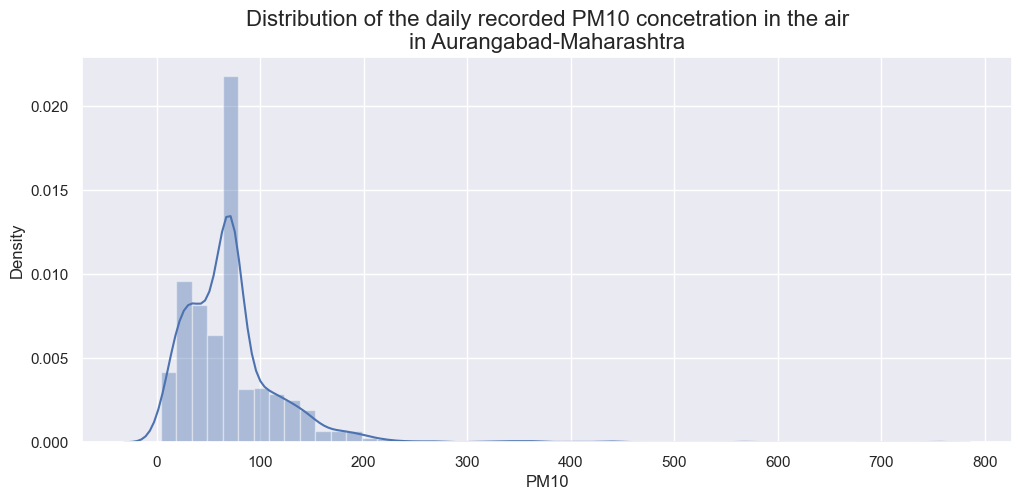

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM10'],bins=50)
plt.title('Distribution of the daily recorded PM10 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [8]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM10']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM10'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM10']

# display the resulting DataFrame
print(monthly_average)

       median_PM10
month             
1             71.5
2             85.8
3             71.5
4             71.5
5             71.5
6             38.7
7             39.0
8             37.2
9             34.0
10            71.5
11            71.5
12            71.5


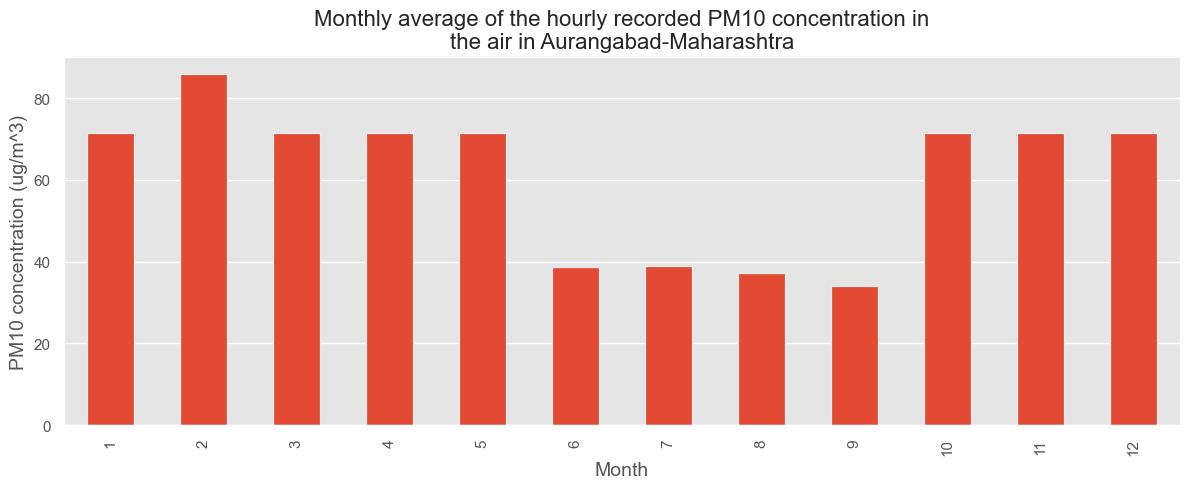

In [9]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM10 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

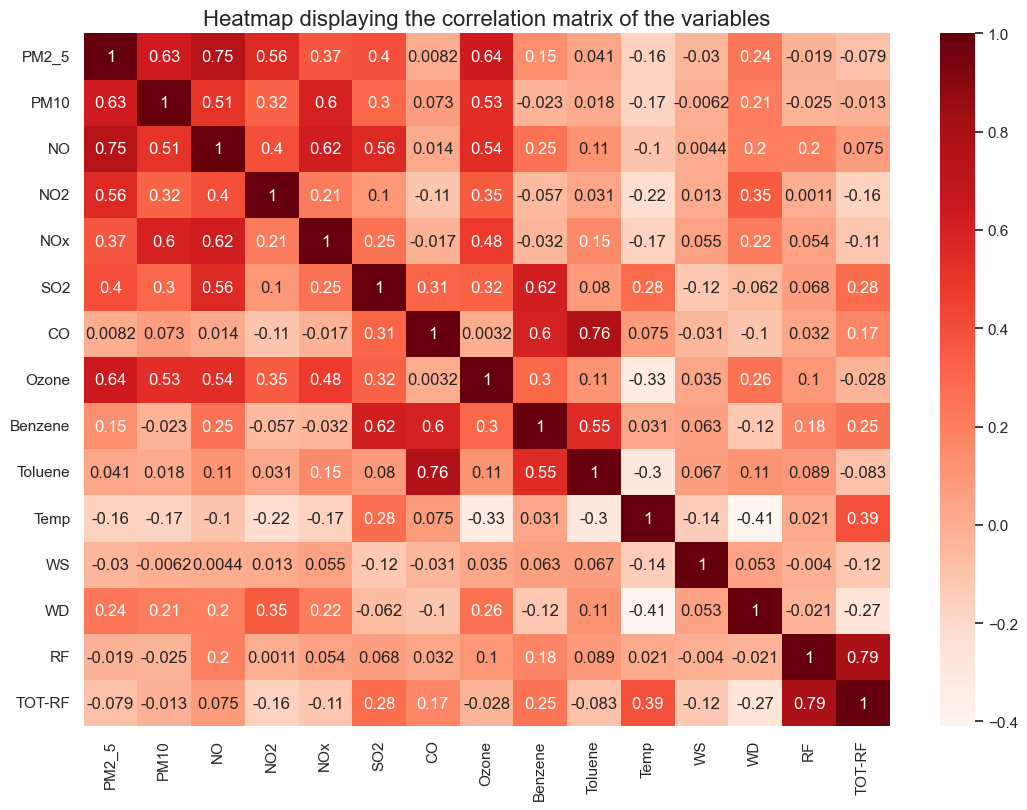

In [10]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx',  'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Temp','WS','WD','RF','TOT-RF']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [11]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const      75.169361
PM2_5       5.732100
PM10        3.122000
NO          5.917518
NO2         1.676395
NOx         3.854137
SO2         4.316738
CO          5.469752
Ozone       2.927131
Benzene     5.051586
Toluene     6.800266
Temp        2.186631
WS          1.113640
WD          1.425789
RF          6.219123
TOT-RF      7.514249
dtype: float64

In [12]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,Temp,WS,WD,RF,TOT-RF
0,125.41,203.30,32.97,14.84,51.10,84.07,1.14,11.34,2.85,1.57,27.36,0.28,124.75,0.32,30.24
1,95.27,170.37,32.75,14.74,50.48,83.48,0.78,11.40,2.28,1.14,32.81,0.28,122.43,0.22,21.07
2,81.50,153.04,35.73,16.08,55.39,88.23,1.13,11.45,2.23,1.15,32.50,0.28,124.11,0.22,21.43
3,88.87,151.95,31.44,14.15,48.53,80.16,1.17,11.43,2.20,1.21,32.12,0.28,116.17,0.24,23.05
4,91.47,159.32,28.73,12.93,44.04,73.49,0.95,11.44,1.73,0.88,36.54,0.28,132.06,0.18,17.19


In [13]:
columns_to_drop = ['WS','WD','RF','TOT-RF']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const      45.322363
PM2_5       5.173024
PM10        2.987089
NO          5.026243
NO2         1.594619
NOx         3.653918
SO2         3.845039
CO          4.677364
Ozone       2.830754
Benzene     4.586056
Toluene     5.731186
Temp        1.845083
dtype: float64

In [14]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','SO2','CO','Ozone','Benzene','Toluene','Temp']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM10'] = np.log(newdata['PM10'])

In [15]:
mul_reg = formula.ols(formula="PM10 ~ PM2_5  + NO + NO2 + NOx + SO2 + CO + Ozone + Temp + Benzene + Toluene ",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     178.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.11e-248
Time:                        13:48:30   Log-Likelihood:                -979.77
No. Observations:                1551   AIC:                             1982.
Df Residuals:                    1540   BIC:                             2040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8972      0.074     52.318      0.000       3.751       4.043
PM2_5          0.0040      0.000     10.505      0.000       0.003       0.005
NO            -0.0114      0.001     -9.990      0.000      -0.014      -0.009
NO2           -0.0002      0.000     -1.290      0.197      -0.000       0.000
NOx            0.0063      0.001      7.841      0.000       0.005       0.008
SO2            0.0124      0.001     14.459      0.000       0.011       0.014
CO             0.0078      0.001      8.682      0.000       0.006       0.010
Ozone          0.0120      0.001     10.796      0.000       0.010       0.014
Temp          -0.0163      0.002     -9.590      0.000      -0.020      -0.013
Benzene       -0.0370      0.003    -13.788      0.000      -0.042      -0.032
Toluene       -0.0013      0.003     -0.485      0.628      -0.006       0.004
==============================================================================
Omnibus:                      182.690   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.708
Skew:                          -0.434   Prob(JB):                    5.28e-200
Kurtosis:                       6.667   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM10',axis=1)
y = newdata['PM10']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,Temp
0,1.184245,0.459140,-0.301127,0.795262,1.950823,-0.515491,-0.688495,-0.265512,-0.986143,-0.790119
1,0.701889,0.449206,-0.302156,0.769408,1.928430,-0.529106,-0.685065,-0.327740,-1.028605,-0.189050
2,0.481516,0.583762,-0.288362,0.974158,2.108717,-0.515870,-0.682207,-0.333199,-1.027617,-0.223240
3,0.599464,0.390056,-0.308229,0.688092,1.802418,-0.514357,-0.683350,-0.336474,-1.021692,-0.265149
4,0.641074,0.267692,-0.320788,0.500856,1.549257,-0.522677,-0.682779,-0.387785,-1.054279,0.222323


In [17]:
y.head()

0    5.314683
1    5.137973
2    5.030699
3    5.023552
4    5.070915
Name: PM10, dtype: float64

In [18]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [19]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM10',axis=1)
y = ensemble_data['PM10']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [21]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [22]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.9140070151976041

Score on test data: 0.7547101953506918

Root Mean Squared Error: 26.164545802294978

Overall model accuracy: 0.7547101953506918


In [23]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.85787505415746

Score on test data: 0.7770684697616843

Best parameters found:


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 4}

Root Mean Squared Error: 24.943603819626162

Overall model accuracy: 0.7770684697616843


In [25]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_10.xlsx')

In [26]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [27]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8955448910943409

Score on test data: 0.8125916423916418

Root Mean Squared Error: 22.870092900496807

Overall model accuracy: 0.8125916423916418


In [28]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [29]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.8503695754961524

Score on test data: 0.7538418892541625

Best parameters found:


{'n_estimators': 400,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 7}

Root Mean Squared Error: 26.210815080513374

Overall model accuracy: 0.7538418892541625


In [30]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_10.xlsx')

In [31]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [32]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9976051453021374

Score on test data: 0.8902263662086708

Root Mean Squared Error: 17.503402179691463

Overall model accuracy: 0.8902263662086708


In [33]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [34]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9993081701480077

Score on test data: 0.8284407828999543

Best parameters found:


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.30000000000000004}

Root Mean Squared Error: 21.88167076460516

Overall model accuracy: 0.8284407828999543


In [35]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_10.xlsx')

In [36]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1551 1551
